In [283]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

import sys
sys.path.insert(0, '../fem')
from gaussianrandomfields import *

In [284]:
size = 100

In [208]:
f = np.random.multivariate_normal(np.zeros(size), cov=np.identity(size), size=1)
f.shape

(1, 100)

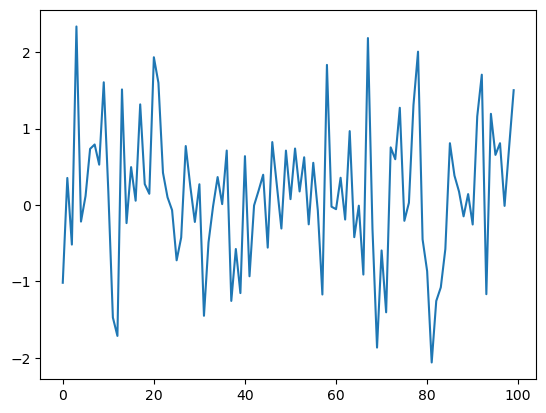

In [209]:
plt.plot(f.T)

In [210]:
size = 21
x = np.linspace(0,1,size)
cov = np.zeros((size,size))
l = 0.2
for i in range(size):
    for j in range(size):
        cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))

In [211]:
f = np.random.multivariate_normal(np.zeros(size), cov=cov, size=1)

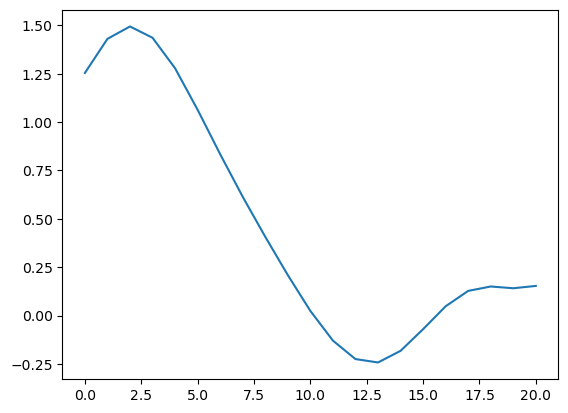

In [212]:
plt.plot(f.T)

In [213]:
size = 21
X, Y = np.mgrid[0:1:size*1j, 0:1:size*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T
x.shape

(441, 2)

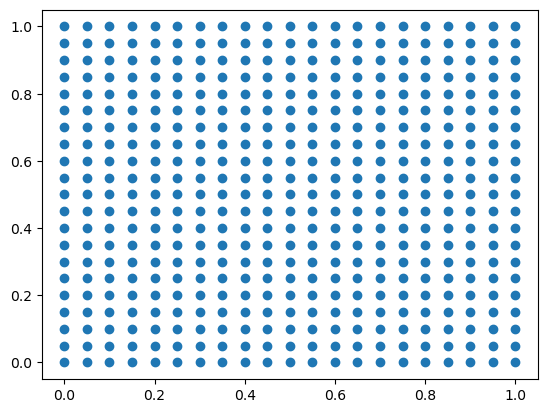

In [214]:
plt.scatter(x[:,0], x[:,1])

In [215]:
@jit
def compute_Sigma(N_gridpoints,l):

    cov = np.zeros((N_gridpoints**2,N_gridpoints**2))
    for i in range(N_gridpoints**2):
        for j in range(N_gridpoints**2):
            cov[i,j] = np.exp(-np.sum((x[i] - x[j])**2, axis=-1)/(2*l**2))
            
    return cov

In [261]:
cov = compute_Sigma(21,0.2)

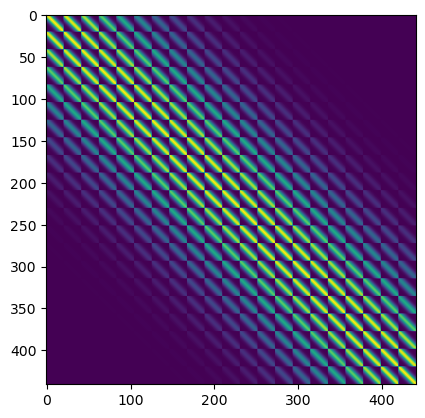

In [262]:
plt.imshow(cov)

In [263]:
f = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)
Deltaf = np.amax(f) - np.amin(f)
f = f/Deltaf*0.97
f = f - np.amin(f) + 0.02
f = f.flatten()

0.02
0.99


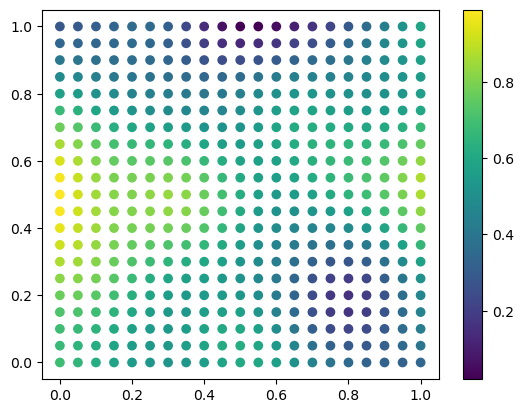

In [264]:
plt.scatter(x[:,0], x[:,1], c=f)
plt.colorbar()
print(np.amin(f))
print(np.amax(f))

In [271]:
from scipy.interpolate import RBFInterpolator
from scipy.interpolate import Rbf

In [272]:
f.shape

(441,)

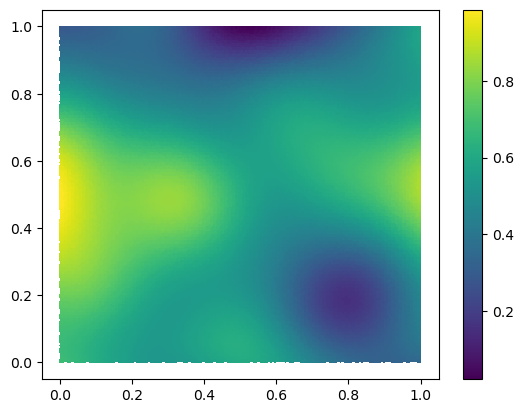

In [273]:
function = Rbf(x[:,0], x[:,1], f, function='gaussian', epsilon=0.2)
size = 100
X, Y = np.mgrid[0:1:size*1j, 0:1:size*1j]
x_i = np.vstack([X.ravel(), Y.ravel()]).T
f_i = function(x_i[:,0], x_i[:,1])
plt.tripcolor(x_i[:,0], x_i[:,1], f_i)
plt.colorbar()

In [274]:
function.function

'gaussian'

In [278]:
x_i.shape

(10000, 2)

In [270]:
print(np.amax(f_i))
print(np.amin(f_i))

0.9901410043239594
0.015519142150878906


In [232]:
x_i.shape

(10000, 2)

In [69]:
d = 2
N_gridpoints = 21
l = 0.2
positive = True

X, Y = np.mgrid[0:1:N_gridpoints*1j, 0:1:N_gridpoints*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T

cov = np.zeros((N_gridpoints**2,N_gridpoints**2))
for i in range(N_gridpoints**2):
    for j in range(N_gridpoints**2):
        cov[i,j] = np.exp(-np.sum((x[i] - x[j])**2, axis=-1)/(2*l**2))
        
GRF = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)

if positive==True:    
    DeltaGRF = np.amax(GRF) - np.amin(GRF)
    GRF = GRF/DeltaGRF*0.97
    GRF = GRF - np.amin(GRF) + 0.02

    GRF = GRF.flatten()

GRFfunction = RBFInterpolator(x, GRF, kernel='gaussian', epsilon=1/(1/N_gridpoints - 1))
from scipy.interpolate import Rbf

In [70]:
GRFfunction = RBFInterpolator(x, GRF, kernel='gaussian', epsilon=1/(1/N_gridpoints - 1))

In [71]:
a = np.array([0.1,0.1])
GRFfunction(a[None,:])

array([-0.015625])

In [279]:
N_gridpoints = 21
x = np.linspace(0,1,N_gridpoints)
cov = np.zeros((N_gridpoints,N_gridpoints))
l = 0.1
for i in range(N_gridpoints):
    for j in range(N_gridpoints):
        cov[i,j] = np.exp(-(x[i] - x[j])**2/(2*l**2))
        
GRF = np.random.multivariate_normal(np.zeros(N_gridpoints), cov=cov, size=1)

DeltaGRF = np.amax(GRF) - np.amin(GRF)
GRF = GRF/DeltaGRF*2
GRF = GRF - np.amin(GRF) - 1 

GRF = GRF.flatten()
function = Rbf(x, GRF, function='gaussian', epsilon=l)

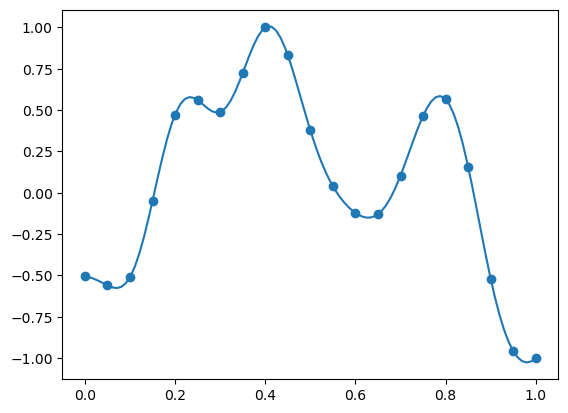

In [280]:
x_plot = np.linspace(0,1,100)
plt.scatter(x,GRF)
plt.plot(x_plot, function(x_plot))

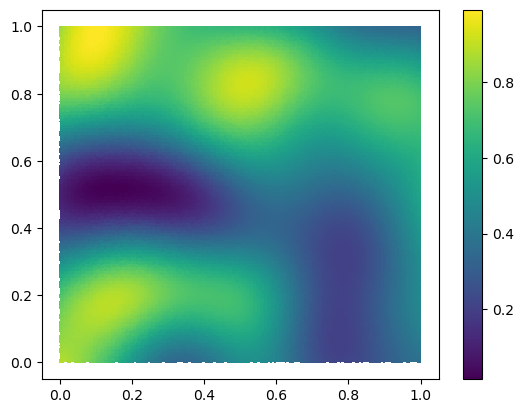

In [297]:
N_gridpoints = 21 
l = 0.2 
positive = True

GRFfunction2D = GRF2D(N_gridpoints, l, positive)

size = 100
X, Y = np.mgrid[0:1:size*1j, 0:1:size*1j]
x_2D = np.vstack([X.ravel(), Y.ravel()]).T
f_2D = GRFfunction2D(x_2D[:,0], x_2D[:,1])
plt.tripcolor(x_2D[:,0], x_2D[:,1], f_2D)
plt.colorbar()

/home/prins/st8/anaconda3/lib/python3.10/site-packages/scipy/interpolate/_rbf.py:267: LinAlgWarning: Ill-conditioned matrix (rcond=2.92963e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


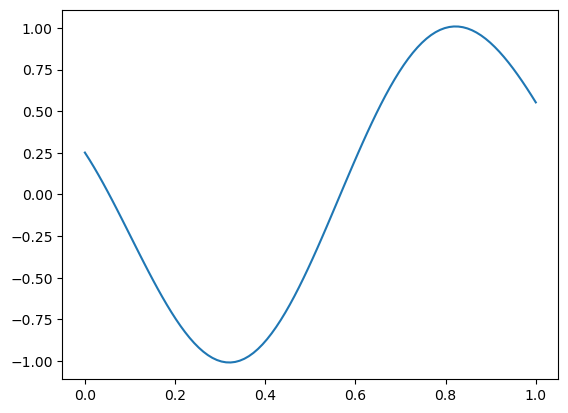

In [309]:
N_gridpoints = 21 
l = 0.4

GRFfunction1D = GRF1D(N_gridpoints, l)

size = 100
x_1D = np.linspace(0,1,size)

f_1D = GRFfunction1D(x_1D)
plt.plot(x_1D,f_1D)

(1,)


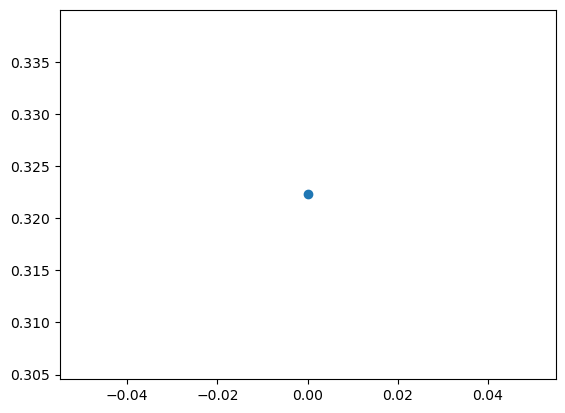

In [302]:
N_gridpoints = 21 
l = 0.2 

GRFfunction1D = GRF1D(N_gridpoints, l)

size = 1
x_1D = np.linspace(0,1,size)
print(x_1D.shape)
f_1D = GRFfunction1D(x_1D)
plt.scatter(x_1D,f_1D)

In [308]:
a = np.array([0.1])
print(a.shape)
print(GRFfunction1D(a).shape)

(1,)
(1,)
